In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dados/suicide_statistic_limpo.csv')

In [4]:
df['population'].isnull().sum()

5460

In [5]:
null_population = df[df['population'].isnull()]

In [8]:
print(null_population[['country', 'year', 'sex', 'age']].value_counts())

country             year  sex     age        
Anguilla            1983  female  15-24 years    1
Nicaragua           2008  female  35-54 years    1
                          male    55-74 years    1
                                  5-14 years     1
                                  35-54 years    1
                                                ..
Dominican Republic  1980  female  75+ years      1
                                  55-74 years    1
                                  5-14 years     1
                                  35-54 years    1
Zimbabwe            1990  male    75+ years      1
Name: count, Length: 5460, dtype: int64


In [9]:
grupo_means = df.groupby(['sex', 'age', 'year'])['population'].mean()

In [10]:
print(grupo_means)

sex     age          year
female  15-24 years  1979    1.727285e+06
                     1980    1.925421e+06
                     1981    1.670850e+06
                     1982    1.642452e+06
                     1983    1.739529e+06
                                 ...     
male    75+ years    2012    4.731616e+05
                     2013    4.967168e+05
                     2014    5.221629e+05
                     2015    6.341486e+05
                     2016    6.983051e+05
Name: population, Length: 456, dtype: float64


In [11]:
df['population'] = df.apply(
    lambda row: grupo_means.loc[row['sex'], row['age'], row['year']]
    if pd.isnull(row['population']) and (row['sex'], row['age'], row['year']) in grupo_means.index
    else row['population'],
    axis=1
)


In [12]:
df['population'].isnull().sum()

0

In [16]:
df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [21]:
df['suicide_rate'] = (df['suicides_no'] / df['population']) * 100000

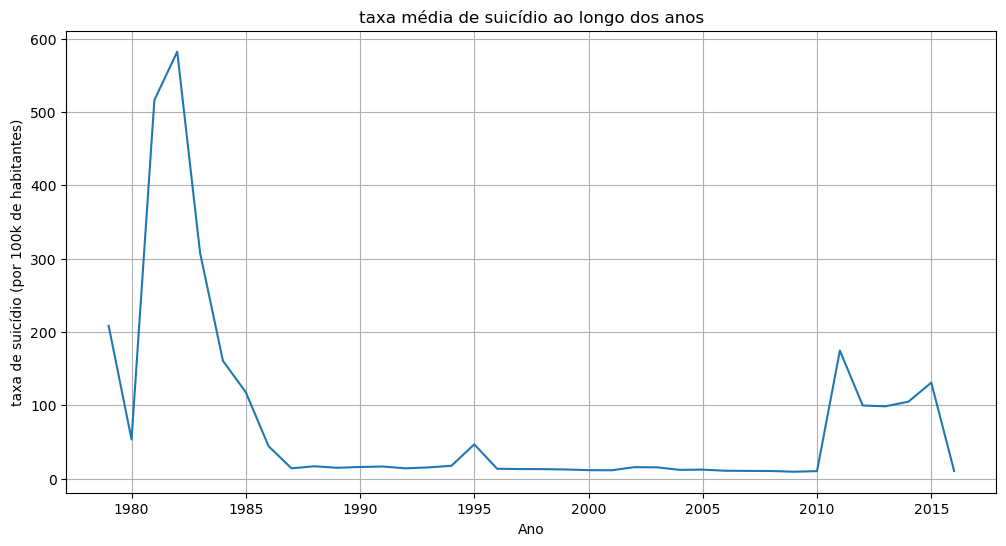

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('year')['suicide_rate'].mean().reset_index(), x='year', y='suicide_rate')
plt.title('taxa média de suicídio ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('taxa de suicídio (por 100k de habitantes)')
plt.grid(True)
plt.show()

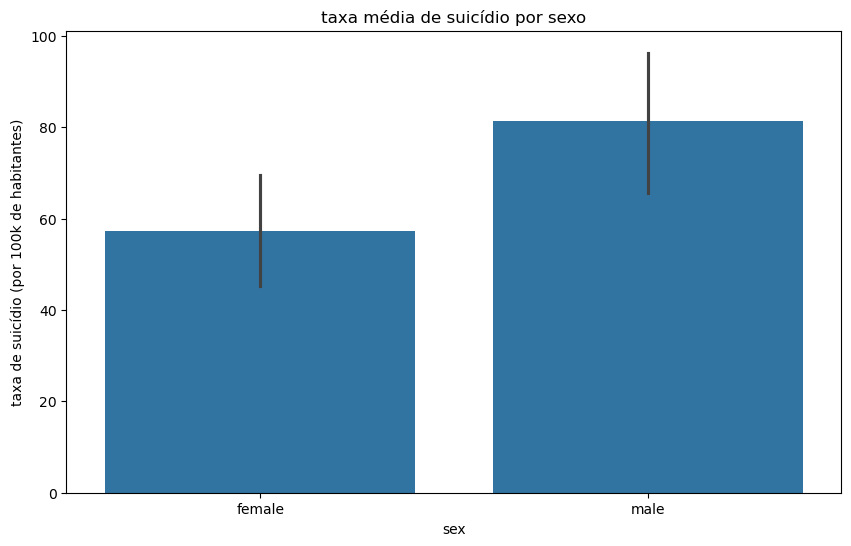

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sex', y='suicide_rate', estimator='mean')
plt.title('taxa média de suicídio por sexo')
plt.ylabel('taxa de suicídio (por 100k de habitantes)')
plt.show()

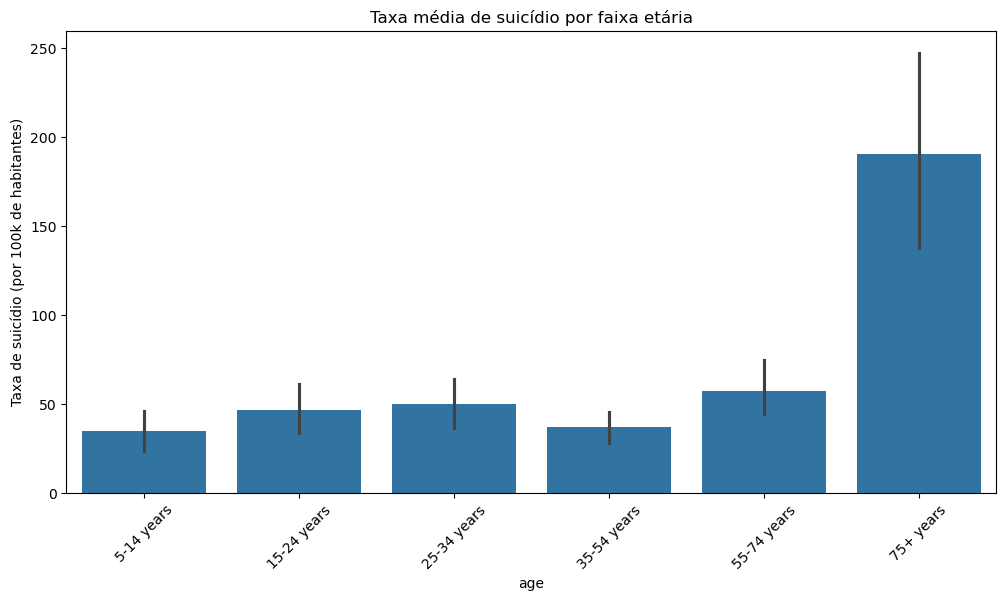

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='age', y='suicide_rate', estimator='mean', order=[
    '5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
plt.title('Taxa média de suicídio por faixa etária')
plt.ylabel('Taxa de suicídio (por 100k de habitantes)')
plt.xticks(rotation=45)
plt.show()